In [50]:
import pandas as pd

In [196]:
data = pd.read_csv('data/revenue-data.csv')

In [197]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,GCSE,Public Sector,Female,North West,22306.84
996,54,155.42,231.17,5,Other,Private sector,Male,Wales,27704.97
997,22,2376.10,287.15,11,Other,Private sector,Male,South East,62542.89
998,49,4355.04,27.78,0,Degree,Private sector,Male,Northern Ireland,96745.84


In [198]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84
996,54,155.42,231.17,5,5,0,1,9,27704.97
997,22,2376.10,287.15,11,5,0,1,7,62542.89
998,49,4355.04,27.78,0,1,0,1,5,96745.84


In [217]:
df = data.drop(columns= ["Salary"])
df = df.drop(columns= ["Region"])
df = df.drop(columns= ["Sex"])
df

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType
0,32,314.06,30.14,0,1,0
1,20,3758.36,149.36,4,2,0
2,36,601.72,21.87,0,3,0
3,21,44.89,182.80,9,3,0
4,24,614.80,194.34,0,2,0
...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1
996,54,155.42,231.17,5,5,0
997,22,2376.10,287.15,11,5,0
998,49,4355.04,27.78,0,1,0


In [218]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [219]:
dbscan = DBSCAN(eps = 1, min_samples = 8)

In [220]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [221]:
dbscan.fit(scaled_data)
label = dbscan.labels_
import numpy as np
np.unique(label)

array([-1,  0,  1,  2], dtype=int64)

In [222]:
df["cluster_id"] = label
df.cluster_id.value_counts()

 0    549
-1    332
 1     89
 2     30
Name: cluster_id, dtype: int64

In [223]:
df

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,cluster_id
0,32,314.06,30.14,0,1,0,0
1,20,3758.36,149.36,4,2,0,-1
2,36,601.72,21.87,0,3,0,0
3,21,44.89,182.80,9,3,0,0
4,24,614.80,194.34,0,2,0,0
...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,-1
996,54,155.42,231.17,5,5,0,0
997,22,2376.10,287.15,11,5,0,-1
998,49,4355.04,27.78,0,1,0,-1


In [224]:
df.pivot_table(columns=['cluster_id'], aggfunc='size')

cluster_id
-1    332
 0    549
 1     89
 2     30
dtype: int64

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='WorkType'>

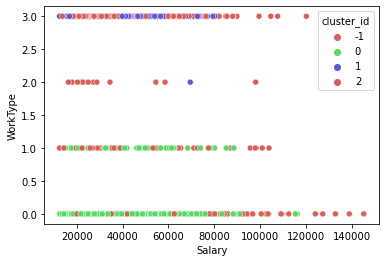

In [241]:
sns.scatterplot( data.Salary, df.WorkType, hue = df.cluster_id, palette="hls")

In [269]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

cluster = []
inertia = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data.drop(columns = ["Salary"]))
    inertia.append(kmeans.inertia_)
    cluster.append(i)

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


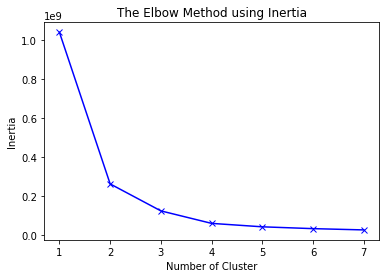

In [270]:
plt.plot(cluster, inertia,  'bx-')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [271]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data.drop(columns='Salary'))
labels = kmeans.labels_
data["labels"] = labels

In [272]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,labels
0,32,314.06,30.14,0,1,0,1,2,60173.49,0
1,20,3758.36,149.36,4,2,0,0,7,42965.45,1
2,36,601.72,21.87,0,3,0,1,1,54924.41,0
3,21,44.89,182.80,9,3,0,0,5,26734.99,0
4,24,614.80,194.34,0,2,0,1,6,15325.23,0


<AxesSubplot:xlabel='Salary', ylabel='SiteSpending'>

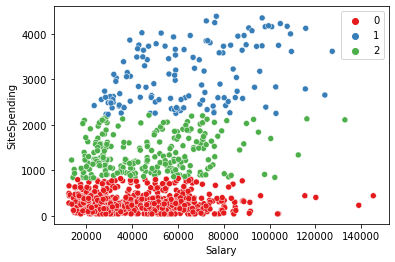

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = 'Salary', y = 'SiteSpending' , hue = kmeans.labels_ ,data = data, palette = 'Set1')